Importation des Librairies

In [310]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import re
import os
import seaborn as sns
import warnings
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import numpy as np

Chargement du Fichier CSV

In [311]:
data = pd.read_csv("src/fraud test.csv")

Compréhension des Données 

In [312]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


Informations sur les types de données et les dimensions

In [313]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

Echantillonage de Données


In [314]:
sample = data.sample(frac=0.1, random_state=0)
print(sample)

        Unnamed: 0 trans_date_trans_time        cc_num  \
102051      102051      27/07/2020 01:15  4.789910e+15   
270705      270705      29/09/2020 10:37  2.131940e+14   
308877      308877      16/10/2020 14:35  5.020380e+11   
465523      465523      12/12/2020 09:04  3.598900e+15   
358267      358267      07/11/2020 12:02  3.023880e+13   
...            ...                   ...           ...   
196442      196442      29/08/2020 17:01  3.583290e+15   
517393      517393      22/12/2020 22:41  3.019740e+13   
262484      262484      26/09/2020 11:10  3.587040e+15   
163352      163352      17/08/2020 15:09  4.623560e+12   
260108      260108      25/09/2020 02:42  2.576710e+15   

                                        merchant        category     amt  \
102051                     fraud_Heidenreich PLC     grocery_pos  218.76   
270705  fraud_Rutherford, Homenick and Bergstrom     grocery_net   48.83   
308877       fraud_Prosacco, Kreiger and Kovacek            home   70.86   

Visualisation des données

Identification des valeurs nulles

In [315]:
nombre_valeurs_nulles_par_colonne = sample.isnull().sum()

Affichage des valeurs nulles 

In [316]:
print(nombre_valeurs_nulles_par_colonne)

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


Masque de la colonne " is fraud "

In [317]:
# on fait sur la data setcomplet car sinon pas assez de données car seulement 213 lignes qui sortent avec le data sample

fraud_mask = ((data['is_fraud'] == 1))
dfm = data[(fraud_mask)]
dfm.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1685,1685,21/06/2020 22:06,3.560730e+15,fraud_Hamill-D'Amore,health_fitness,24.84,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,15/09/1969,16bf2e46c54369a8eab2214649506425,1371852399,32.575873,-102.604290,1
1767,1767,21/06/2020 22:32,6.564460e+15,"fraud_Rodriguez, Yost and Jenkins",misc_net,780.52,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,42.5545,-90.3508,1306,Public relations officer,10/09/1958,ab4b379d2c0c9c667d46508d4e126d72,1371853942,42.461127,-91.147148,1
1781,1781,21/06/2020 22:37,6.564460e+15,fraud_Nienow PLC,entertainment,620.33,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,42.5545,-90.3508,1306,Public relations officer,10/09/1958,47a9987ae81d99f7832a54b29a77bf4b,1371854247,42.771834,-90.158365,1
1784,1784,21/06/2020 22:38,4.005680e+15,"fraud_Heathcote, Yost and Kertzmann",shopping_net,1077.69,William,Perry,M,458 Phillips Island Apt. 768,...,30.4590,-90.9027,71335,Herbalist,31/05/1994,fe956c7e4a253c437c18918bf96f7b62,1371854335,31.204974,-90.261595,1
1857,1857,21/06/2020 23:02,3.560730e+15,fraud_Hermann and Sons,shopping_pos,842.65,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,15/09/1969,f6838c01f5d2262006e6b71d33ba7c6d,1371855736,31.315782,-102.736390,1


In [318]:
dfm.shape

(2145, 23)

In [319]:
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800430e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521420e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635330e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992350e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


Supressions des features non perspicaces 

In [320]:
colonne_a_retirer = ['cc_num', 'first', 'last', 'city', 'state', 'street', 'zip', 'trans_num', 'Unnamed: 0', 'merchant', 'unix_time']

In [321]:
dfmclean = dfm.drop(colonne_a_retirer, axis=1)

In [322]:
dfmclean.head()

,trans_date_trans_time,category,amt,gender,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
1685,21/06/2020 22:06,health_fitness,24.84,F,31.8599,-102.7413,23,Cytogeneticist,15/09/1969,32.575873,-102.604290,1
1767,21/06/2020 22:32,misc_net,780.52,M,42.5545,-90.3508,1306,Public relations officer,10/09/1958,42.461127,-91.147148,1
1781,21/06/2020 22:37,entertainment,620.33,M,42.5545,-90.3508,1306,Public relations officer,10/09/1958,42.771834,-90.158365,1
1784,21/06/2020 22:38,shopping_net,1077.69,M,30.4590,-90.9027,71335,Herbalist,31/05/1994,31.204974,-90.261595,1
1857,21/06/2020 23:02,shopping_pos,842.65,F,31.8599,-102.7413,23,Cytogeneticist,15/09/1969,31.315782,-102.736390,1


In [323]:
dfmclean["trans_date_trans_time"]=pd.to_datetime(dfmclean["trans_date_trans_time"], format= "%d/%m/%Y %H:%M")
dfmclean["dob"]=pd.to_datetime(dfmclean["dob"], format= "%d/%m/%Y")

annee_actuelle = pd.Timestamp.now().year
dfmclean['age'] = annee_actuelle - dfmclean["dob"].dt.year

dfmclean["day_of_the_week"]=dfmclean["trans_date_trans_time"].dt.weekday
dfmclean["month"]=dfmclean["trans_date_trans_time"].dt.month
dfmclean["day"]=dfmclean["trans_date_trans_time"].dt.day
dfmclean["year"]=dfmclean["trans_date_trans_time"].dt.year

# Extraire l'heure de la fraude
dfmclean["hour"] = dfmclean["trans_date_trans_time"].dt.hour

In [324]:
# Créer une nouvelle colonne avec la valeur par défaut "Grande ville"
dfmclean['ville_type'] = 'grande_ville'

# Filtrer les villes avec une population entre 0 et 1130 et mettre à jour la nouvelle colonne
dfmclean.loc[(dfmclean['city_pop'] >= 0) & (dfmclean['city_pop'] <= 1131), 'ville_type'] = 'petite_ville'



dfmclean.loc[(dfmclean['city_pop'] > 1131) & (dfmclean['city_pop'] <= 2870), 'ville_type'] = 'moyenne_ville'


dfmclean.loc[(dfmclean['city_pop'] > 2870) & (dfmclean['city_pop'] <= 12335), 'ville_type'] = 'grande_ville'


dfmclean.loc[(dfmclean['city_pop'] > 12335), 'ville_type'] = 'megapole'

In [325]:
colonne_a_retirer = ['trans_date_trans_time', 'dob']
dfmclean = dfmclean.drop(colonne_a_retirer, axis=1)

In [326]:
dfmclean.head()

,category,amt,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,age,day_of_the_week,month,day,year,hour,ville_type
1685,health_fitness,24.84,F,31.8599,-102.7413,23,Cytogeneticist,32.575873,-102.604290,1,55,6,6,21,2020,22,petite_ville
1767,misc_net,780.52,M,42.5545,-90.3508,1306,Public relations officer,42.461127,-91.147148,1,66,6,6,21,2020,22,moyenne_ville
1781,entertainment,620.33,M,42.5545,-90.3508,1306,Public relations officer,42.771834,-90.158365,1,66,6,6,21,2020,22,moyenne_ville
1784,shopping_net,1077.69,M,30.4590,-90.9027,71335,Herbalist,31.204974,-90.261595,1,30,6,6,21,2020,22,megapole
1857,shopping_pos,842.65,F,31.8599,-102.7413,23,Cytogeneticist,31.315782,-102.736390,1,55,6,6,21,2020,23,petite_ville


In [327]:
dfmclean.describe(include="all")

,category,amt,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,age,day_of_the_week,month,day,year,hour,ville_type
count,2145,2145.000000,2145,2145.000000,2145.000000,2.145000e+03,2145,2145.000000,2145.000000,2145.0,2145.000000,2145.000000,2145.000000,2145.000000,2145.0,2145.000000,2145
unique,14,NaN,2,NaN,NaN,NaN,177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,shopping_net,NaN,F,NaN,NaN,NaN,Science writer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,petite_ville
freq,506,NaN,1164,NaN,NaN,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,539
mean,NaN,528.356494,NaN,39.019971,-90.445556,6.452932e+04,NaN,39.018618,-90.465222,1.0,52.738462,3.054545,9.135198,15.139860,2020.0,14.087646,NaN
std,NaN,392.747594,NaN,5.076671,14.147521,2.192075e+05,NaN,5.093782,14.159252,0.0,17.618287,2.052099,1.772877,8.859445,0.0,9.699821,NaN
min,NaN,1.780000,NaN,20.082700,-155.488000,2.300000e+01,NaN,19.161782,-156.480766,1.0,22.000000,0.000000,6.000000,1.000000,2020.0,0.000000,NaN
25%,NaN,214.510000,NaN,34.957200,-96.743000,1.131000e+03,NaN,35.017480,-96.697100,1.0,38.000000,1.000000,8.000000,7.000000,2020.0,3.000000,NaN
50%,NaN,371.940000,NaN,39.893600,-88.093500,2.870000e+03,NaN,39.744929,-88.040722,1.0,52.000000,3.000000,9.000000,14.000000,2020.0,22.000000,NaN
75%,NaN,907.770000,NaN,42.180800,-79.785600,1.233500e+04,NaN,42.208725,-79.909134,1.0,65.000000,5.000000,11.000000,24.000000,2020.0,23.000000,NaN


In [328]:
jobs = dfmclean['job'].unique()
print(jobs)

['Cytogeneticist' 'Public relations officer' 'Herbalist'
 'Librarian, public' 'Scientist, research (maths)' 'Make'
 'Physiological scientist' 'Community arts worker' 'Systems developer'
 'Call centre manager' 'Engineering geologist' 'Psychiatric nurse'
 'Exercise physiologist' 'Toxicologist' 'Osteopath' 'Water engineer'
 'Engineer, water' 'Press photographer' 'Archaeologist' 'Hydrogeologist'
 'Chief Strategy Officer' 'Designer, industrial/product'
 'Forensic psychologist' 'Chiropodist' 'Radio producer'
 'Claims inspector/assessor' 'Therapist, horticultural'
 'Clinical research associate' 'IT trainer' 'Insurance risk surveyor'
 'Psychologist, counselling' 'Chartered loss adjuster'
 'Therapist, occupational' 'Dance movement psychotherapist'
 'Teaching laboratory technician' 'Physiotherapist'
 'Planning and development surveyor' 'Counsellor'
 'Engineer, building services' 'Ecologist'
 'Sport and exercise psychologist' 'Investment banker, operational'
 'Commissioning editor' 'Retail banker

In [329]:

# Supposons que votre DataFrame s'appelle clean_data et qu'il contient les colonnes 'lat', 'long', 'merch_lat' et 'merch_long'

# Définition de la fonction de calcul de la distance
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371.0  # Rayon de la Terre en kilomètres

    # Convertir les latitudes et longitudes en radians
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    # Différences de latitude et longitude
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Formule haversine
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    # Distance en kilomètres
    distance = R * c
    
    return distance
    # Assurez-vous que cette fonction est correctement indentée ici

# Calcul de la distance pour chaque ligne du DataFrame
dfmclean['distance'] = dfmclean.apply(lambda row: haversine_distance(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)

# Affichage des premières lignes du DataFrame avec la nouvelle colonne
print(dfmclean.head())

            category      amt gender      lat      long  city_pop  \
1685  health_fitness    24.84      F  31.8599 -102.7413        23   
1767        misc_net   780.52      M  42.5545  -90.3508      1306   
1781   entertainment   620.33      M  42.5545  -90.3508      1306   
1784    shopping_net  1077.69      M  30.4590  -90.9027     71335   
1857    shopping_pos   842.65      F  31.8599 -102.7413        23   

                           job  merch_lat  merch_long  is_fraud  age  \
1685            Cytogeneticist  32.575873 -102.604290         1   55   
1767  Public relations officer  42.461127  -91.147148         1   66   
1781  Public relations officer  42.771834  -90.158365         1   66   
1784                 Herbalist  31.204974  -90.261595         1   30   
1857            Cytogeneticist  31.315782 -102.736390         1   55   

      day_of_the_week  month  day  year  hour     ville_type    distance  
1685                6      6   21  2020    22   petite_ville   80.649140  
17

In [330]:
dfmclean.describe(include="all")

,category,amt,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,age,day_of_the_week,month,day,year,hour,ville_type,distance
count,2145,2145.000000,2145,2145.000000,2145.000000,2.145000e+03,2145,2145.000000,2145.000000,2145.0,2145.000000,2145.000000,2145.000000,2145.000000,2145.0,2145.000000,2145,2145.000000
unique,14,NaN,2,NaN,NaN,NaN,177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,shopping_net,NaN,F,NaN,NaN,NaN,Science writer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,petite_ville,NaN
freq,506,NaN,1164,NaN,NaN,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,539,NaN
mean,NaN,528.356494,NaN,39.019971,-90.445556,6.452932e+04,NaN,39.018618,-90.465222,1.0,52.738462,3.054545,9.135198,15.139860,2020.0,14.087646,NaN,76.213905
std,NaN,392.747594,NaN,5.076671,14.147521,2.192075e+05,NaN,5.093782,14.159252,0.0,17.618287,2.052099,1.772877,8.859445,0.0,9.699821,NaN,29.264066
min,NaN,1.780000,NaN,20.082700,-155.488000,2.300000e+01,NaN,19.161782,-156.480766,1.0,22.000000,0.000000,6.000000,1.000000,2020.0,0.000000,NaN,3.839619
25%,NaN,214.510000,NaN,34.957200,-96.743000,1.131000e+03,NaN,35.017480,-96.697100,1.0,38.000000,1.000000,8.000000,7.000000,2020.0,3.000000,NaN,55.293105
50%,NaN,371.940000,NaN,39.893600,-88.093500,2.870000e+03,NaN,39.744929,-88.040722,1.0,52.000000,3.000000,9.000000,14.000000,2020.0,22.000000,NaN,78.593368
75%,NaN,907.770000,NaN,42.180800,-79.785600,1.233500e+04,NaN,42.208725,-79.909134,1.0,65.000000,5.000000,11.000000,24.000000,2020.0,23.000000,NaN,98.422515


Analyse Univariée

In [331]:
#repartition de l'age
fig = px.histogram(dfmclean, x="gender", color= "gender")
fig.show()


In [332]:
# repartition de l'age

#violin = + c large  + c que il y en a dans cette catégorie d'age

fig = px.violin(dfmclean, y="age", color= "gender", box=True)
fig.show()

In [333]:
fig = px.histogram(dfmclean, y="job", color= "gender")
fig.update_layout(width=1000, height=2500)
fig.show()

In [334]:
# Définir l'ordre des catégories de la colonne 'job' en fonction du nombre d'occurrences
category_order = dfmclean['job'].value_counts().index.tolist()

# Créer l'histogramme en utilisant l'ordre défini
fig = px.histogram(dfmclean, y="job", color="is_fraud", category_orders={"job": category_order})

# Mettre à jour la mise en page
fig.update_layout(width=1000, height=2500)

# Afficher l'histogramme
fig.show()

# On constate que les Science Writer sont les personnes qui sont les plus victimes de fraude

In [335]:
# Définir l'ordre des catégories de la colonne 'job' en fonction du nombre d'occurrences
category_order = dfmclean['job'].value_counts().index.tolist()

# Créer l'histogramme en utilisant l'ordre défini
fig = px.histogram(dfmclean, y="job", color="is_fraud", category_orders={"job": category_order}, color='gender')

# Mettre à jour la mise en page
fig.update_layout(width=1000, height=2500)

# Afficher l'histogramme
fig.show()

# On constate que les Science Writer sont les personnes qui sont les plus victimes de fraude

SyntaxError: keyword argument repeated: color (183318806.py, line 5)

In [ ]:
fig = px.scatter_mapbox(dfmclean, lat="lat", lon="long", color="category", mapbox_style="carto-positron")
fig.show()

# la majo des fraudes se situe sur l'est des usa 

In [ ]:
fig = px.scatter_mapbox(dfmclean, lat="merch_lat", lon="merch_long", color="category", mapbox_style="carto-positron")
fig.show()

In [ ]:
fig = px.scatter_mapbox(dfmclean, lat="lat", lon="long", color="amt", mapbox_style="carto-positron")
fig.show()

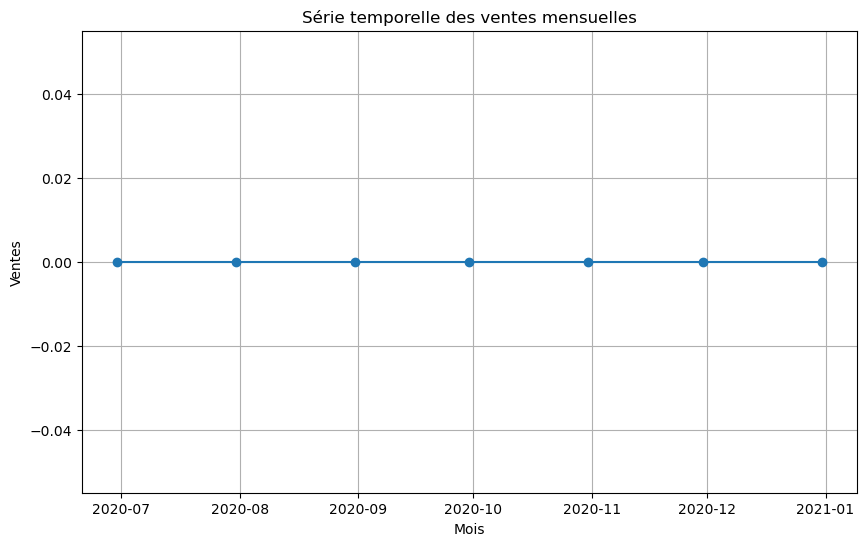

In [ ]:
series = pd.Series(dfmclean['amt'], index=pd.to_datetime(dfmclean[['year', 'month', 'day']]))

# Agréger les données par mois et calculer la somme des ventes pour chaque mois
ventes_par_mois = series.resample('ME').sum()  

# Tracer la série temporelle agrégée
plt.figure(figsize=(10, 6))
plt.plot(ventes_par_mois.index, ventes_par_mois.values, marker='o', linestyle='-')
plt.title('Série temporelle des ventes mensuelles')
plt.xlabel('Mois')
plt.ylabel('Ventes')
plt.grid(True)
plt.show()

Analyse Bivariée

In [ ]:
fig = px.histogram(dfmclean, x="age", y="amt", color="gender")
fig.update_layout(bargap=0.2)
fig.show()

#au total, + de femme qui sont victimes de fraudes que des hommes sauf 

#sur la trentaine c'est plus les hommes

##de façon général on observe que ceux sont un peu plus les hommes qui sont victimes de fraude bien qu'à un certains age la tendance soit plutôt des femmes

In [ ]:
# Time Series


# Regrouper les données par mois et calculer la somme des montants de fraude
monthly_total = dfmclean.groupby('month')['amt'].sum().reset_index()

# Renommer les mois pour les rendre plus lisibles
monthly_total['month'] = monthly_total['month'].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'Décember'})

# Créer un histogramme mensuel des montants de fraude
fig = px.bar(monthly_total, x='month', y='amt', title='Total des montants de fraude par mois', color="amt")
fig.update_xaxes(title='Mois')
fig.update_yaxes(title='Total des montants de fraude')
fig.show()

# on constate une saisonalité et que il y a bien + de fraude en été et en automne el'occurence, aout, septembtre et octobre

In [ ]:
# Regrouper les données par mois et calculer la somme des montants de fraude
monthly_total = dfmclean.groupby('day')['amt'].sum().reset_index()


# Créer un histogramme mensuel des montants de fraude
fig = px.bar(monthly_total, x='day', y='amt', title='Total des montants de fraude par jour', color="amt")
fig.update_xaxes(title='day')
fig.update_yaxes(title='Total des montants de fraude')
fig.show()


# On constate cette fois ci que les fraudes sont plus présentes en début et fin de mois , en l'occurence le 8 et le 25 du mois

In [ ]:
# Regrouper les données par mois et calculer la somme des montants de fraude
monthly_total = dfmclean.groupby('hour')['amt'].sum().reset_index()


# Créer un histogramme mensuel des montants de fraude
fig = px.bar(monthly_total, x='hour', y='amt', title='Total des montants de fraude par heure', color="amt")
fig.update_xaxes(title='hour')
fig.update_yaxes(title='Total des montants de fraude')
fig.show()


L'analyse indique que les montants totaux de fraude sont les plus élevés entre 22h et minuit. Cette observation est similaire à celle précédemment notée concernant la moyenne des montants de fraude par heure. Cela renforce l'idée que les fraudeurs ciblent souvent les heures où la vigilance est plus faible ou où il y a moins de surveillance, comme les heures tardives de la nuit.

Cette information peut être utilisée pour orienter les efforts de surveillance et de sécurité vers ces périodes spécifiques afin de détecter et de prévenir les fraudes de manière plus efficace. Il est également important de sensibiliser les utilisateurs aux risques accrus de fraude pendant ces heures et de leur fournir des conseils sur la protection de leurs informations personnelles et financières.

In [ ]:
# Regrouper les données par mois et calculer la somme des montants de fraude
monthly_total = dfmclean.groupby('hour')['amt'].mean().reset_index()


# Créer un histogramme mensuel des montants de fraude
fig = px.bar(monthly_total, x='hour', y='amt', title='Moyenne des montants de fraude par heure', color="amt")
fig.update_xaxes(title='hour')
fig.update_yaxes(title='Moyenne des montants de fraude')
fig.show()

#

L'analyse de ce graphique montre une augmentation de la moyenne des montants de fraude entre midi et minuit. Cela peut indiquer que les fraudeurs sont plus actifs pendant cette période de la journée, peut-être en raison d'une combinaison de facteurs tels que des systèmes de sécurité moins vigilants, une augmentation du nombre de transactions, ou une moindre attention des utilisateurs.

Cette observation peut être utile pour ajuster les stratégies de détection de la fraude et renforcer la sécurité des transactions pendant ces heures où le risque de fraude est plus élevé. Elle souligne également l'importance d'une surveillance continue et proactive pour identifier et prévenir les activités frauduleuses.

In [ ]:


# Créer un graphique à barres montrant la moyenne des montants de fraude par mois

# Regrouper les données par mois et calculer la moyenne des montants de fraude
monthly_mean = dfmclean.groupby('month')['amt'].mean().reset_index()

# Renommer les mois pour les rendre plus lisibles
monthly_mean['month'] = monthly_mean['month'].replace({1: 'Janvier', 2: 'Février', 3: 'Mars', 4: 'Avril', 5: 'Mai', 6: 'Juin', 7: 'Juillet', 8: 'Août', 9: 'Septembre', 10: 'Octobre', 11: 'Novembre', 12: 'Décembre'})

fig = px.bar(monthly_mean, x='month', y='amt', title='Moyenne des montants de fraude par mois', color="amt")
fig.update_xaxes(title='day_of_the_week	')
fig.update_yaxes(title='Moyenne des montants de fraude')

fig.show()


# le mont moyen est + élevé en septembre

In [ ]:
from scipy.stats import f_oneway

In [ ]:
print(dfmclean["city_pop"].min())
print(dfmclean["city_pop"].max())
print(dfmclean["city_pop"].quantile([0.25, 0.5, 0.75]))


23
1577385
0.25     1131.0
0.50     2870.0
0.75    12335.0
Name: city_pop, dtype: float64


In [ ]:
# Effectue l'ANOVA
result_anova = f_oneway(dfmclean[dfmclean['ville_type'] == 'petite_ville']['amt'],
                        dfmclean[dfmclean['ville_type'] == 'moyenne_ville']['amt'],
                        dfmclean[dfmclean['ville_type'] == 'grande_ville']['amt'],
                        dfmclean[dfmclean['ville_type'] == 'megapole']['amt'])

# Affiche le résultat
print("Statistique de test F :", result_anova.statistic)
print("p-value :", result_anova.pvalue)

Statistique de test F : 3.18194710040011
p-value : 0.02304746264830707


In [ ]:
# Créer un boxplot interactif avec Plotly
fig = px.box(dfmclean, x='ville_type', y='amt', title='Montant de fraude par catégorie de ville type')
fig.update_layout(xaxis_title='Catégorie de ville_type', yaxis_title='amt')
fig.show()

In [ ]:
# On cherche à savoir combien de fois une même personne a été victime de fraude

# Créer une nouvelle colonne combinant latitude et longitude pour former une clé unique
dfmclean['coordonnees'] = dfmclean['lat'].astype(str) + ',' + dfmclean['long'].astype(str)

# Compter le nombre de fois où chaque personne a été victime de fraude
victim_counts = dfmclean['coordonnees'].value_counts()

# Créer un diagramme à barres avec Plotly
fig = px.bar(x=victim_counts.index, y=victim_counts.values, labels={'x':'Coordonnées', 'y':'Nombre de fraudes'}, title='Nombre de fraudes par personne')
fig.show()

# on observe que plusieurs personnes été plusieurs fois victime de fraudes, le opremier presque 20 fois par exemple

In [ ]:
# Définir les limites des catégories de montants et les étiquettes
montant_bins = [0, 215, 372, 908, np.inf]
montant_labels = ['0-215', '216-372', '373-908', '908+']

# Ajouter une colonne 'categorie_amt' pour indiquer la catégorie de montant pour chaque personne
total_per_person['categorie_amt'] = pd.cut(total_per_person['amt'], bins=montant_bins, labels=montant_labels, right=False)

# Définir les couleurs pour chaque catégorie de montant
color_discrete_map = {'0-215': 'blue', '216-372': 'green', '373-908': 'orange', '908+': 'red'}

# Créer le scatter map box avec la taille des points ajustée en fonction de la somme totale d'argent volée
fig = px.scatter_mapbox(total_per_person, lat='lat', lon='long', hover_name='coordonnees',
                        title='Emplacements des fraudes (Taille des points en fonction de la somme totale d\'argent volée)',
                        size='amt', color='categorie_amt', mapbox_style="open-street-map",
                        color_discrete_map=color_discrete_map)
fig.show()

NameError: name 'total_per_person' is not defined

In [ ]:
# Regrouper les données par emploi et calculer la somme des montants de fraude pour chaque emploi
fraud_amount_by_job = dfmclean.groupby('job')['amt'].sum().reset_index()

# Sélectionner les 10 emplois les plus frauduleux
top_10_jobs = fraud_amount_by_job.nlargest(10, 'amt')

# Créer le graphique à barres
fig = px.bar(top_10_jobs, y='job', x='amt', orientation='h',
             
             labels={'job': 'Emploi', 'amt': 'Montant de fraude'})

# Mettre à jour la mise en page
fig.update_layout(title='Top 10 des emplois les plus victimes de fraude par montant de fraude',
                  xaxis_title='Montant de fraude',
                  yaxis_title='Emploi',
                  width=1000,
                  height=600)

# Afficher le graphique
fig.show()

Analyse Multivariée

In [ ]:
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Analyse multivariée

In [336]:
# Créer un scatter plot multivarié avec une hauteur plus grande
fig = px.scatter(dfmclean, x='amt', y='city_pop', color='gender', size='age',
                 hover_data=['job', 'day_of_the_week', 'ville_type'],
                 title='Scatter Plot Multivarié')

# Afficher le scatter plot avec une hauteur plus grande
fig.update_layout(height=800)  # Spécifiez la hauteur désirée en pixels

# Afficher le scatter plot
fig.show()

# donc la plupart des fraudes se produisent dans des petites villes  de moins de 2000 habitants et principalement